# **pandas**
** pandas 라이브러리 > 설치해야 함
1. 자료구조 : 시리즈, 데이터프레임

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
type(df)

pandas.core.frame.DataFrame

In [14]:
df.head() # 위의 5건 출력 - defalt, subset(전체 데이터 중 일부만 꺼낸 것)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 데이터 프레임 이해하기

In [8]:
df.shape # (raw, col), 건 수, 항목 수

(1704, 6)

In [13]:
df.columns # 데이터 인덱스 보기

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [17]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [18]:
# EDA 탐색적 데이터 분석 - shape, columns, dtypes

In [20]:
df.info()
# non-null : 데이터 없는 값이 없음 = 결측치 없음
# Dtype의 object : string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출하기

### 1.2.1 열 추출

In [22]:
df[ 'country' ] # 데이터 인덱스를 사용해 호출

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [26]:
type(df['country']) # 시리즈 객체

pandas.core.series.Series

In [28]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [31]:
df['country', 'continent'] # 오류 > 두 개 입력했을 때 튜플로 처리하여 오류

KeyError: ('country', 'continent')

In [33]:
df[ ['country', 'continent'] ] # 여러 인덱스 호출할 시 리스트 형식으로 꺼내야 함

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [36]:
df2 = df[ ['country', 'year', 'lifeExp', 'gdpPercap'] ]
df2.head()

,country,year,lifeExp,gdpPercap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


In [39]:
type(df1), type(df2) # df1의 경우 시리즈(한 줄), df2는 데이터프레임(여러 줄)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1.2.2 행 추출

** 행의 기본 인덱스(행번호) : **iloc**  - iloc(행 번호)  
** 행에 사용자가 부여한 인덱스 : **loc** - loc(행 이름)   
  \> default는 range index

In [40]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [43]:
# 100번째 행 추출
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [48]:
# 마이너스 인덱스 : pandas에서는 마이너스 인덱스 지원X 
#df.loc[-1] > 지원X
df.loc[ df.shape[0] -1 ] # row 수 확인한 값에서 1 빼서 마지막 값 추출

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [49]:
# 여러 행 추출 - [ ] 로 지정
df.loc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [50]:
# loc[], iloc[]의 차이는 컬럼을 꺼내는 방식

df.loc[ [0], [ 'country' ]]

,country
0,Afghanistan


In [51]:
df.iloc[[0], [ 'country' ]] # 오류 > numeric 인덱스 이용하지 않아서

IndexError: .iloc requires numeric indexers, got ['country']

In [52]:
df.iloc[[0], [0]]

,country
0,Afghanistan


In [62]:
# slicing : colon / 전체일 때는 : 표시
df.loc[:10, 'country']

0     Afghanistan
1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
5     Afghanistan
6     Afghanistan
7     Afghanistan
8     Afghanistan
9     Afghanistan
10    Afghanistan
Name: country, dtype: object

In [59]:
df.iloc[ :10, [0]]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


### 1.2.3 range()를 활용한 인덱스 지정

In [70]:
r_list = list(range(1,5,2)) # range에서 step 이용해 짝수번쨰 열 추출
df.iloc[ :, r_list]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [71]:
df.iloc[ : , :6:2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [74]:
df.iloc[ :11, [-1] ]

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 게산하기

In [77]:
# descriptive - numeric data

# 전체 데이터의 요약
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [ ]:
# 그룹화


In [80]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [82]:
# 대륙별 인구 pop의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False)

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [85]:
# 최대값 기준 정렬
df.groupby('continent')['pop'].max().sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [87]:
# 빈도수 계산 : nunique()
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [88]:
# value_counts()

df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

<Axes: xlabel='year'>

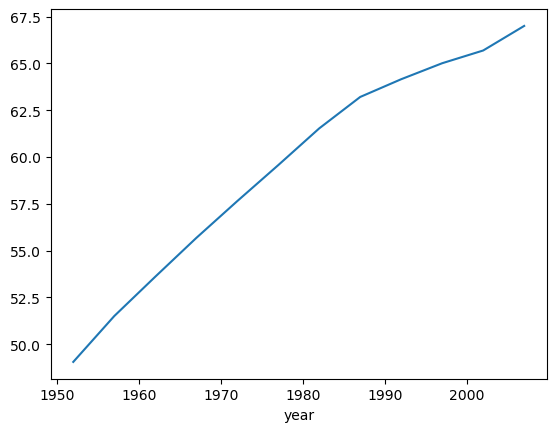

In [89]:
year_lifeExp_mean = df.groupby('year')['lifeExp'].mean()
year_lifeExp_mean.plot()

# 2. 데이터 다루기

## 2.1 시리즈 만들기  

- 1차원 자료 : 리스트 유사, numpy의 array를 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입
- 

In [1]:
import pandas as pd

In [5]:
s = pd.Series(['banana', 10])
# 넣은 데이터 - series의 values, 자동으로 index 생성
# 이용하기 위해선 변수 지정해야 함
type(s) # series 타입

pandas.core.series.Series

In [6]:
s #Range index

0    banana
1        10
dtype: object

In [9]:
# 생성 시 index 지정할 경우 지정한 인덱스명이 함께 담김 
s1 = pd.Series( data = ['홍길동', '김길동'] , index = ['a', 'b']) 
s1 # 딕셔너리와 비슷한 형식

a    홍길동
b    김길동
dtype: object

In [10]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [11]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [12]:
s1.loc['a']

'홍길동'

In [14]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [15]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [16]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [17]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [30]:
# name column를 인덱스로 지정해서 데이터 프레임 생성하기
sc1 = pd.DataFrame(
    data = {"Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61]        
    }, 
    index = ["Rosaline Franklin", "William Gosset"])
sc1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [25]:
scientists.index = ["Rosaline Franklin", "William Gosset"]
scientists

,Name,Occupation,Born,Died,Age
Rosaline Franklin,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [34]:
# 추출하는 방법
# 1. 대괄호
#f_row = sc1[0]
# 2. loc
#f_row = sc1.loc["Rosaline Franklin"]
# 3. iloc
#f_row = sc1.iloc[0]
f_row

Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: Rosaline Franklin, dtype: object

In [38]:
# 데이터 값 추출
f_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [39]:
# 데이터 인덱스 추출
f_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [41]:
sc1['Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [42]:
sc1.loc[:, 'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [48]:
# 시리즈 추출
age = sc1['Age']
age.mean() # 평균, 최대최소값 등 추출 가능

49.0

### 데이터 불러오기

In [53]:
sc2 = pd.read_csv('./data/scientists.csv')

In [60]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [55]:
sc2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [57]:
ages = sc2['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [58]:
ages.describe() # 기술통계량 확인

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [61]:
ages[ ages > ages.mean() ] # 벡터화, 불리언값 테스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [62]:
ages + ages # numpy의 ndarray 개념이므로 연산 가능 > 벡터+벡터(rank1 array)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [64]:
ages + 10 # element wise > broadcasting을 통해 벡터+스칼라 연산 가능

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [65]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [69]:
ages + s1 
# rank는 같지만 길이가 다른 벡터의 연산 > 오류나지 않음. 
# numpy의 브로드캐스팅과 차이 : s1의 빈값이 NaN이므로 연산 시 NaN
# 그러므로 반드시 벡터의 길이가 같아야 함

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [71]:
# defalt는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [79]:
rev_ages = ages.sort_index(ascending=False) # 역순으로 정렬
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [77]:
ages*2 # 역순으로 정렬했으나 연산 시 다시 오름차순으로 정렬됨

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [80]:
ages + rev_ages # index에 맞춰서 sort 후 연산함 > 같은 인덱스 기준으로 자동 정렬 후 연산

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [82]:
first_half = sc2[:4]
second_half = sc2[4:]
first_half

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [86]:
# 데이터프레임에 스칼라 연산
sc2 * 2
# 결과 : 문자열은 반복, 숫자는 *2 실시됨
# column의 type에 따라 연산

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [85]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [89]:
# 숫자로 구성한 데이터프레임의 더하기 연산 +, add()
df1 = df2 = pd.DataFrame(
    data = [[1,2,3], [4,5,6]]
)
df1.add(df2) # 각 값에 벡터 연산 실시

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열 추가

In [91]:
sc2

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [92]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [95]:
# str > datetime으로 변환 : to_datetime()
# 연도 - 대문자 Y 사용, 01월처럼 0 채우기 위해 % 사용
born_datetime = pd.to_datetime(sc2['Born'], format='%Y-%m-%d') 
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [96]:
# 열 추가
sc2['born_dt'] = born_datetime
sc2.head(3)

,Name,Born,Died,Age,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12


In [97]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 516.0+ bytes


In [98]:
died_datetime = pd.to_datetime(sc2['Died'], format='%Y-%m-%d')
sc2['died_dt'] = died_datetime

In [99]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
 6   died_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 580.0+ bytes


In [135]:
sc2['age_days'] = sc2['died_dt'] - sc2['born_dt']
sc2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [124]:
sc2['age_days'].dtype

dtype('<m8[ns]')

In [134]:
# 날짜를 연도로 바꾸기
# series.apply(함수) > 원하는 연산 한 번에 적용 
import numpy as np
sc2['age_days'] = (sc2['age_days'].dt.days / 365).apply(np.floor) # np.floor : 버림

AttributeError: Can only use .dt accessor with datetimelike values

In [132]:
sc2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [142]:
# df.assign(변수 = 수식) : 수식값을 변수에 할당, col name은 새로 만들어짐
sc2 = sc2.assign(
    age_days_assign = sc2['died_dt'] - sc2['born_dt'], 
    # 기존의 칼럼을 이용해서 계산한 결과를 새로운 칼럼에 할당
    age_assign = (sc2['age_days'].dt.days / 365).apply(np.floor) # 임시 칼럼을 따로 만듦
)
sc2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


## 2.5 열 삭제

In [139]:
sc2.drop( [ 'Age' ], axis='columns' ) # 지정한 변수가 row인지 column인지 작성

,Name,Born,Died,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days


In [140]:
sc2 # drop한 데이터가 그대로 남아있음 > 삭제해야 할 경우 새로운 변수 할당 

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [143]:
sc2_d = sc2.drop( [ 'Age' ], axis='columns' )
sc2_d

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [145]:
# drop() : 재할당 하지 않고 바로 적용하는 방법 - inplace=True
# sc2.drop( [ 'Age' ], axis='columns', inplace=True ) 실시 시 원본에 바로 적용(잘 이용하지 않음)

## 2.6 파일 저장  
- file i/o 이용해서 저장 및 읽기 가능 - pickle로 저장  
- 파이썬의 데이터 파일 형식 : 바이너리 저장/ 읽기  
- 시리즈, 데이터프레임 저장
- csv, tsc, excel 지원
- to_csv(), read_csv()
- excel의 경우 openpyx1을 설치해야 함
- pip install openpyxl

In [149]:
sc2['Name'].to_pickle('./data/scientists_names_series.pickle') # 저장경로/파일이름

In [155]:
# 피클 파일에서 읽어오기 - pandas에서 제공하는 pd.read 이용 시 open()하지 않고 바로 read 가능
series_pk1 = pd.read_pickle('./data/scientists_names_series.pickle')
series_pk1                       

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [156]:
# 참고) 파이썬 내장 모듈
# fp = open()
# load(fp) : read
# dump(fp) : write

In [157]:
# 데이터프레임을 저장, 다시 읽어오기
sc2.to_pickle('./data/scientists_df.pickle')

In [158]:
pd.read_pickle('./data/scientists_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [160]:
# csv로 저장 및 읽어오기
sc2.to_csv('./data/scientists_df.csv')

In [164]:
sc_scv_df = pd.read_csv('./data/scientists_df.csv')
type(sc_scv_df)

pandas.core.frame.DataFrame

In [166]:
# dictionary로 저장 및 읽어오기
sc_dict = sc2.to_dict()
sc_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [167]:
sc_dict_df = pd.DataFrame.from_dict(sc_dict)
sc_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [170]:
# df > json
sc_json = sc2.to_json(orient='records', indent=2, date_format='iso')
sc_json

'[\n  {\n    "Name":"Rosaline Franklin",\n    "Born":"1920-07-25",\n    "Died":"1958-04-16",\n    "Age":37,\n    "Occupation":"Chemist",\n    "born_dt":"1920-07-25T00:00:00.000",\n    "died_dt":"1958-04-16T00:00:00.000",\n    "age_days":"P13779DT0H0M0S",\n    "age_days_assign":"P13779DT0H0M0S",\n    "age_assign":37.0\n  },\n  {\n    "Name":"William Gosset",\n    "Born":"1876-06-13",\n    "Died":"1937-10-16",\n    "Age":61,\n    "Occupation":"Statistician",\n    "born_dt":"1876-06-13T00:00:00.000",\n    "died_dt":"1937-10-16T00:00:00.000",\n    "age_days":"P22404DT0H0M0S",\n    "age_days_assign":"P22404DT0H0M0S",\n    "age_assign":61.0\n  },\n  {\n    "Name":"Florence Nightingale",\n    "Born":"1820-05-12",\n    "Died":"1910-08-13",\n    "Age":90,\n    "Occupation":"Nurse",\n    "born_dt":"1820-05-12T00:00:00.000",\n    "died_dt":"1910-08-13T00:00:00.000",\n    "age_days":"P32964DT0H0M0S",\n    "age_days_assign":"P32964DT0H0M0S",\n    "age_assign":90.0\n  },\n  {\n    "Name":"Marie Curi

In [172]:
# pprint: 출력 형식을 지정할 수 있음
import pprint
pprint.pprint(sc_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":"P13779DT0H0M0S",\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":"P22404DT0H0M0S",\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'


In [176]:
sc_json.to_pickle('./data/sci_json.pickle') # 문자열이라 pickle 불가능
# type(sc_json)

AttributeError: 'str' object has no attribute 'to_pickle'

In [178]:
# json > df
df_json = pd.read_json(sc_json)

C:\Users\Hyeonji Kim\AppData\Local\Temp\ipykernel_13608\1684125383.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_json = pd.read_json(sc_json)


# 3. 데이터 전처리

## 3.1. 깔끔한 데이터  

- 깔끔하지 않은 데이터
1. 열 이름 : 변수가 아니라 변수의 값이 온 경우(1개가 아니라 여러개)

In [4]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [9]:
# 분산되어 있는 칼럼을 하나로 합치기 > wide data
# 하나의 칼럼으로 합치기 > 언피봇(피봇 되돌리기), melt
pew_long = pew.melt(id_vars = 'religion', var_name = 'income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [11]:
# wide data > long data로 바꾸기
bbd = pd.read_csv('./data/billboard.csv')
bbd

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
bbd_long = bbd.melt(id_vars = ['year', 'artist', 'track', 'time', 'date.entered'], 
                    var_name = 'weeks', 
                    value_name = 'count'
                   )
bbd_long

,year,artist,track,time,date.entered,weeks,count
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [15]:
# 열 이름에 var, data가 포함된 경우
evola = pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [16]:
evola_long = evola.melt(id_vars = ['Date', 'Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [19]:
var_split = evola_long.variable.str.split("_")
type(var_split) # evola_long이 dataframe이므로 series

pandas.core.series.Series

In [22]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)
status_values, country_values

(0        Cases
 1        Cases
 2        Cases
 3        Cases
 4        Cases
          ...  
 1947    Deaths
 1948    Deaths
 1949    Deaths
 1950    Deaths
 1951    Deaths
 Name: variable, Length: 1952, dtype: object,
 0       Guinea
 1       Guinea
 2       Guinea
 3       Guinea
 4       Guinea
          ...  
 1947      Mali
 1948      Mali
 1949      Mali
 1950      Mali
 1951      Mali
 Name: variable, Length: 1952, dtype: object)

In [24]:
evola_long['status'] = status_values
evola_long['country'] = country_values

In [25]:
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [26]:
evola_long1 = evola.melt(id_vars=['Date', 'Day'])

In [27]:
var_split1 = evola_long1.variable.str.split('_', expand=True)
var_split1

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [28]:
evola_long1[['status', 'country']] = var_split1
evola_long1

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
